# Razvrščanje v skupine

Razvrščanje v skupine (angl. _clustering_), imenujemo ga tudi gručenje ali rojenje, je iskanje takega _razbitja_ množice podanih objektov v skupine, kjer so objekti v isti skupini bolj _podobni_ drug drugemu, kot pa objektom iz drugih skupin.

## Formalna definicija razvrščanja v skupine

Nalogo razvrščanja v skupine definiramo skozi vhodne in izhodne podatke. Vhodni podatki za razvrščanje v skupine so:

* $S$ je **množica objektov** $u$, ki jih imenujemo jih tudi enote ali primeri.

* $d\colon S \times S \to \mathbb{R}^{+}_0$ je **funkcija razdalje**, ki za podani par objektov $u$ in $v$ vrne nenegativno realno število, ki izmeri razdaljo $d(u, v)$ med objektoma.

* $k$ je želeno **število skupin**.

Rezultat razvrščanja v skupine je razbitje $\mathcal{C}$ množice $S$ v $k$ podmnožic, ki jih imenujemo skupine. $\mathcal{C}$ je torej množica $k$-tih podmnožic $S$ za katere velja:

1. $\cup_{C \in \mathcal{C}} C = S$, t.j., unija vseh skupin iz razbitja je enaka $S$.

1. $\forall C_1, C_2 \in \mathcal{C}, C_1 \neq C_2: C_1 \cap C_2 = \emptyset$, t.j., skupine so paroma disjunktne.

1. Za objekte iz ene skupine $C \in \mathcal{C}$ velja, da so njihove razdalje do (a) objektov v isti skupini $C$ čim manjše in (b) objektov v drugih skupinah iz $\mathcal{C} \setminus \{ C \}$ čim večje.

Prvi dve lastnosti razbitja $\mathcal{C}$ določata, da je vsak objekt iz $S$ element natanko ene skupine iz $\mathcal{C}$. Tretja lastnost določa, da so skupine v razbitju čim bolj _kompaktne_.

### Funkcija razdalje

Pri razvrščanju v skupine pogosto predpostavimo, da so opazovani objekti vektorji numeričnih vrednosti iz množice $\mathbb{R}^p$. V tem primeru razdaljo med objekti lahko merimo z različnimi predstavniki splošne razdalje Minkowskega:

$$ d(u, v) = \left( \sum_{i=1}^p |u_i - v_i|^q \right)^{\frac{1}{q}}, $$

kjer je $q$ pozitivno realno število ter $u_i$ in $v_i$ sta $i$-ti komponenti vektorjev $u$ in $v$. Dva posebna primera te razdalje sta:

* Evklidska razdalja, $q = 2$: $d_E(u, v) = \sqrt{\sum_{i=1}^p (u_i - v_i)^2}$ in
* Manhattanska razdalja, $q = 1$: $d_M(u, v) = \sum_{i=1}^p |u_i - v_i|$.

### Primer podatkov za razvrščanje v skupine

Pripravimo zdaj umetne podatke za razvrščanje v skupine. Podakte bom vzorčili tako, da si zberemo nekaj točk v prostoru $\mathbb{R}^2$, ki jih bomo poimenovali `centri`. V okolici vsakega centra bomo vzorčili točke iz dve-razsežnostne normalne porazdelitve z vektorjem povprečij enakem centru in enotsko kovariančno matriko.

V ta namen bomo uporabili funkcije, ki jih ponuja modul `np.random` knjižnice `numpy`. Najprej s funkcijo [`default_rng`](https://numpy.org/doc/stable/reference/random/generator.html) tega modula inicializiramo generator naključnih števil `ng`. Nato v okolici vsakega centra `c` iz `centri` z metodo generatorja [`multivariate_normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.multinomial.html) vzorčimo `n` točk. Pri klicu metode podamo tri argumente: seznam (vektor) povprečij, enotsko kovariančno matriko in `size`, ki določa število želenih vzorcev. Nato dimenziji vzorčenih točk razdelimo v zaporedji `x` in `y`, temu dodamo še zaporedje `ids`, ki določi ozanko vsaki točki in vse skupaj združimo v podatkovno tabelo `krogi`. Poglejmo rezultat:

In [1]:
import numpy as np
import pandas as pd

def vzorci_kroge(centri, n = 10, seed = None, crke = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"):
    assert len(centri) <= len(crke), f"Preveč centrov {len(centri)}, največ {len(crke)}."
    assert len({len(c) for c in centri}) == 1, "Vsi centri morajo biti enakih dimenzij."
    assert len(centri[0]) == 2, "Vsi centri morajo imeti dve dimenziji."

    ng = np.random.default_rng(seed = seed)
    xy = [
        ng.multivariate_normal(c, np.identity(len(c)), size = n)
        for c in centri
    ]

    ids = [f"{crke[ci]}{i + 1}" for ci in range(len(centri)) for i in range(n)]

    return pd.DataFrame({
        "id": ids,
        "x": np.concatenate([a[:, 0] for a in xy]),
        "y": np.concatenate([a[:, 1] for a in xy])
    })


centri = [[-5, 0], [0, 2], [3, 0]]

krogi = vzorci_kroge(centri, seed = 42)
krogi

,id,x,y
0,A1,-4.695283,-1.039984
1,A2,-4.249549,0.940565
2,A3,-6.951035,-1.302180
3,A4,-4.872160,-0.316243
4,A5,-5.016801,-0.853044
5,A6,-4.120602,0.777792
6,A7,-4.933969,1.127241
7,A8,-4.532491,-0.859292
8,A9,-4.631249,-0.958883
9,A10,-4.121550,-0.049926


Zdaj smo skoraj pripravljeni vizualizirati podatke. Pred vizualizacijo dodamo podatkovni tabeli še stolpec z oznako centra `krog_id` okoli katerega je bil vzorčena posamezna podatkovna točka:

In [2]:
krogi["krog_id"] = [id[0] for id in krogi.id]
krogi

,id,x,y,krog_id
0,A1,-4.695283,-1.039984,A
1,A2,-4.249549,0.940565,A
2,A3,-6.951035,-1.302180,A
3,A4,-4.872160,-0.316243,A
4,A5,-5.016801,-0.853044,A
5,A6,-4.120602,0.777792,A
6,A7,-4.933969,1.127241,A
7,A8,-4.532491,-0.859292,A
8,A9,-4.631249,-0.958883,A
9,A10,-4.121550,-0.049926,A


Zdaj uporabimo funkcije knjižnice `plotnine` za pripravo statističnega diagrama z vzorčenimi točkami, kjer barva označuje center iz katerega je bila točka vzorčena. Vsaki točki na diagramu dodamo oznako z uporabo geometrijskega objekta [`geom_label`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_label.html):

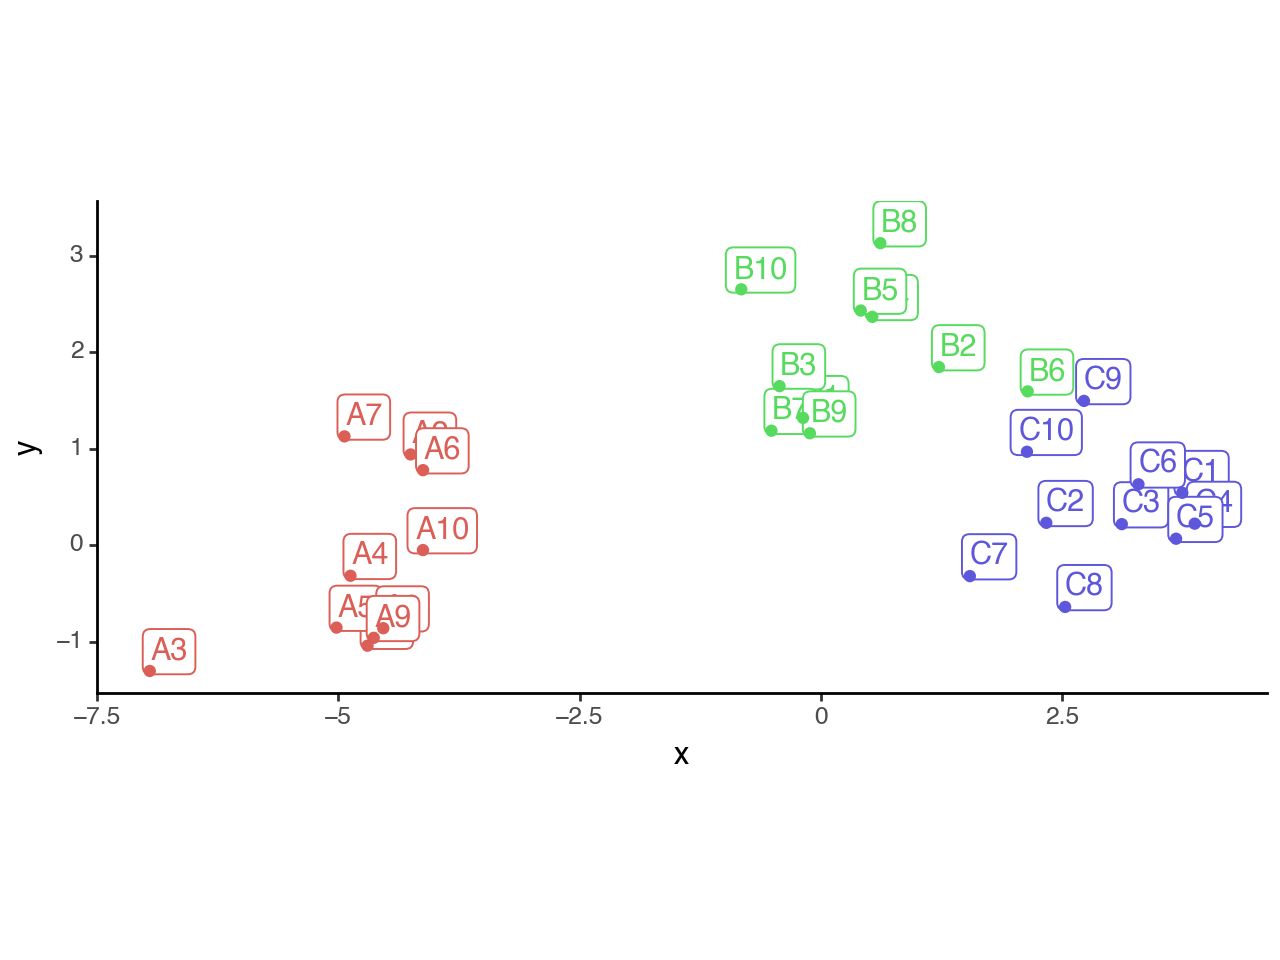

<Figure Size: (640 x 480)>

In [3]:
import plotnine as p9

g_krogi = (
    p9.ggplot(krogi) +
    p9.aes(
        x = "x",
        y = "y",
        label = "id",
        color = "krog_id"
    ) +
    p9.geom_label(
        nudge_x = 0.2,
        nudge_y = 0.2
    ) +
    p9.geom_point() +
    p9.guides(color = None) +
    p9.coord_equal() +
    p9.theme_classic()
)
g_krogi

Poglejmo še kako bi lahko uporabili funkcijo [`annotate`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.annotate.html) za opremljanje statističnega diagrama s krogi, ki označujejo območja vzorčenja za izbrane centre:

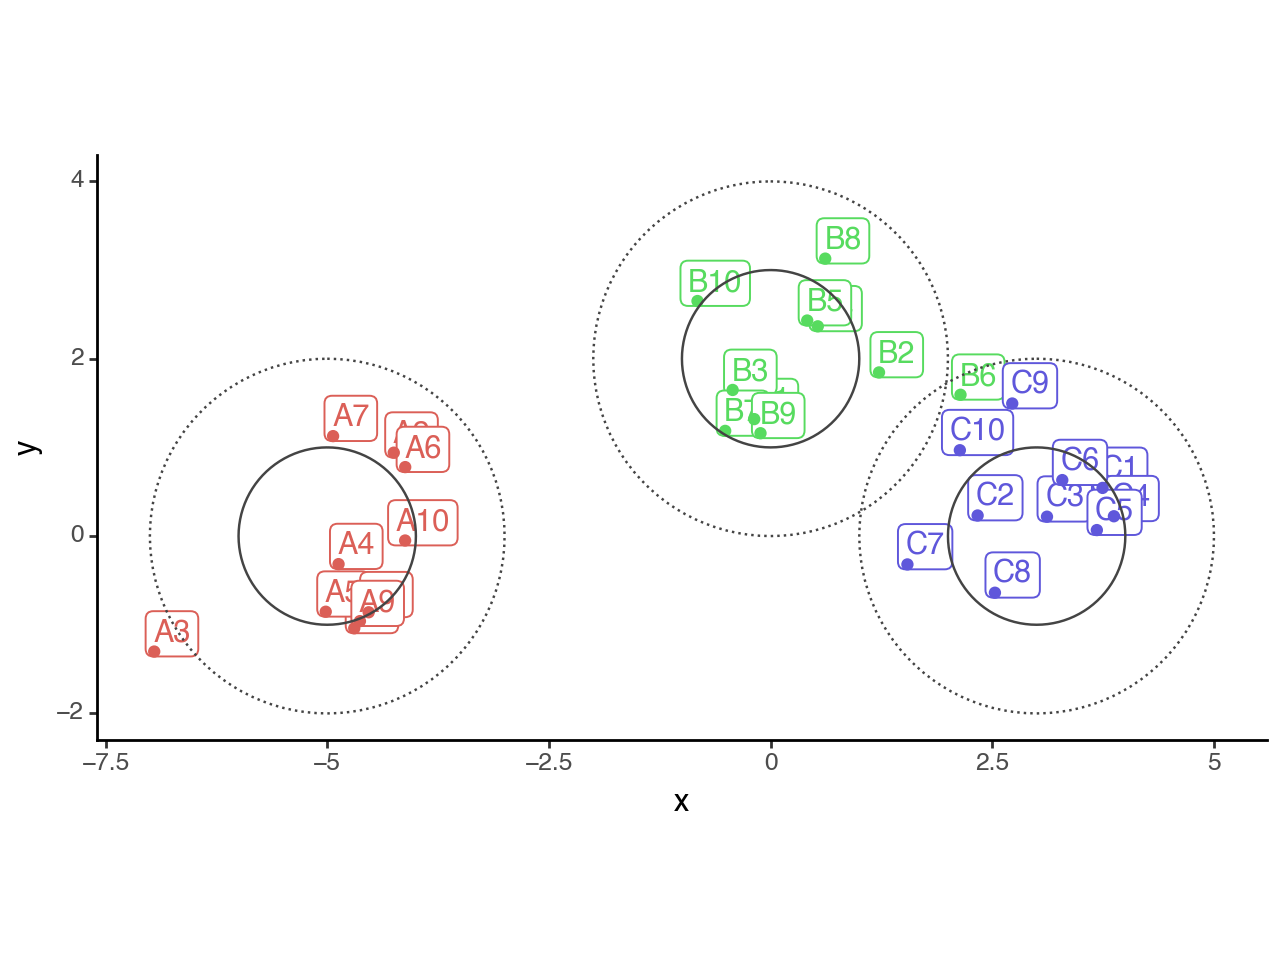

<Figure Size: (640 x 480)>

In [4]:
from math import pi, sin, cos

n = 100
phis = [2 * (i / n) * pi for i in range(n + 1)]

for c in centri:
    g_krogi += (
        p9.annotate(
            "path",
            color = "#444444",
            x = [c[0] + sin(p) for p in phis],
            y = [c[1] + cos(p) for p in phis]
        )
    )
    g_krogi += (
        p9.annotate(
            "path",
            color = "#444444",
            linetype = "dotted",
            x = [c[0] + 2 * sin(p) for p in phis],
            y = [c[1] + 2 * cos(p) for p in phis]
        )
    )
g_krogi

Prvi argument klicev [`annotate`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.annotate.html) določa obliko oznake: v tem primeru smo uporabili `path`, t.j., črto, ki povezuje podane točke. Točke na krožnicah izračunamo tako, da centru prištejemo sinus in kosinus kotov iz intervala $[0, 2 \pi]$.

## Algoritem HAC

Hierarhično razvrščanje v skupine od spodaj navzgor (angl. _Hierarchical Anglomerative Clustering, HAC_).

1. Nastavi začetno razbitje $\mathcal{C} = \{\{u\}: u \in S\}$ tako, da je vsak objekt $u \in S$ tvori svojo skupino.

1. Ponavljaj naslednje tri korake $|S|-1$ krat:

    a. Izberi dve skupini $C_1$ in $C_2$ iz $\mathcal{C}$ tako, da je njihova medsebojna razdalja $D(C_1, C_2)$ najmanjša: $$ \left< C_1, C_2 \right> = \text{argmin}_{C_1 \in \mathcal{C}, \, C_2 \in \mathcal{C}, \, C_1 \neq C_2} D(C_1, C_2). $$

    b. Združi skupini $C_1$ in $C_2$ v novo skupino $C = C_1 \cup C_2$ ter si zapomni $C_1$ in $C_2$.

    c. Zamenjaj skupini $C_1$ in $C_2$ v razbitju $\mathcal{C}$ z novo skupino $C$, t.j., $\mathcal{C} = \mathcal{C} \setminus \{ C_1, C_2 \} \cup \{ C \}$.

Rezultat algoritma je drevesna struktura imenovana dendrogram, ki ponazori združevanje skupin od spodaj navzgor. Primer in rezanje dendrograma.

### Funkcija razdalje med skupinami

Algoritem HAC uporablja funkcijo razdalje $D$ med skupinami objektov (angl. _linkage_), ki jo še moramo definirati. Namreč funkcija razdalje $d$ izračuna razdaljo med objekti. Funkcija $D\colon 2^S \times 2^S \to R^{+}_0$ za podani množici objektov (torej podmnožici množice S) izračuna razdaljo med njima.

En način izračuna funkcije $D$ za dve skupini $C_1$ in $C_2$ je ta, da izračunamo razdalje med vsemi pari objektov iz kartezičnega produkta $C_1 \times C_2$ in nato uporabimo funkcijo agregacije zato, da združimo vrednosti izračunanih razdalj. Tri funkcije združevanja so pogosto v uporabi za definicijo naslednjih treh razdalje med skupinami:

* Celovita (maksimalna): $D(C_1, C_2) = \max _{(u, v) \in C_1 \times C_2} d(u, v)$;
* Enojna (minimalna): $D(C_1, C_2) = \min _{(u, v) \in C_1 \times C_2} d(u, v)$;
* Povprečna: $D(C_1, C_2) = \frac{1}{|C_1| |C_2|} \sum _{(u, v) \in C_1 \times C_2} d(u, v)$.

Ker na vsakem koraku algoritma HAC združujemo dve skupini v eno, lahko funkcijo $D$ definiramo rekurzivno s splošno formulo:

$$ D(C_1 \cup C_2, C) = f(D(C_1, C), D(C_2, C), D(C_1, C_2)), $$
pri čemer robni pogoj rekurzije definira vrednost funkcije $ D(\{u\}, \{v\}) = d(u, v)$ za primere, ko sta oba argumenta funkcije $D$ množici z enim elementom, t.j., enojci $\{u\}$ in $\{v\}$.

Ward je leta 1963 predlagal naslednjo linearno obliko funkcije $f$:

$$ D(C_1 \cup C_2, C) = \alpha_1 D(C_1, C) + \alpha_2 D(C_2, C) + \beta D(C_1, C_2) $$

in določil vrednosti linearnih koeficientov takole:

$$
    \alpha_1 = \frac{|C_1| + |C|}{|C_1| + |C_2| + |C|}, \;
    \alpha_2 = \frac{|C_2| + |C|}{|C_1| + |C_2| + |C|}, \; \text{in} \;
    \beta = - \frac{|C|}{|C_1| + |C_2| + |C|}.
$$

Funkcijo definirano s temi linearnimi koeficienti imenujemo Wardova funkcija razdalje med skupinami. Za razumevanje pomena zgornjih koeficientov pomaga naslednji premislek:

* $\alpha_1 D(C_1, C)$ je prispevek objektov iz $C_1$ k razdalji med $C_1 \cup C_2$ in $C$;

* $\alpha_2 D(C_2, C)$ je prispevek objektov iz $C_2$ k razdalji med $C_1 \cup C_2$ in $C$; in

* $\beta D(C_1, C_2)$ je zmanjševanje zgornjih prispevkov zaradi razdalje med združenima skupinama $C_1$ in $C_2$. Namreč, v primerih, ko združimo dve zelo oddaljeni skupini, sta zgornja dva prispevka obeh skupin k razdalji med $C_1 \cup C_2$ in $C$ prevelika.

### Primer uporabe algoritma HAC

Za razvrščanje v skupine bomo uporabili implementacijo algoritma HAC v knjižnici za strojno učenje `scikit-learn` s krajšim imenom `sklearn` (daljše ime moramo uporabljati pri instalaciji knjižnice, krajše pri njenem uvozu). Iz modula `sklearn.cluster` te knjižnice bomo uvozili in uporabili funkcijo [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html), ki je pravzaprav implementacija algoritma HAC.

Najprej s klicem te funkcije pripravimo objekt `hac` razreda za razvrščanje v skupine. Pri inicializaciji objekta določimo zaželeno število skupin, `n_clusters`, mero razdalje med točkami za razvrščanje `metric` in mero razdalje med skupinami `linkage`:

In [5]:
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters = 3, metric = "euclidean", linkage = "ward")
type(hac)

sklearn.cluster._agglomerative.AgglomerativeClustering

Za razvrščanje podatkov iz podatkovne tabele `krogi` uporabimo metodo `fit` tega razreda. Pri določanju podatkovne tabele moramo biti previdni in paziti, da iz tabele uporabimo zgolj tiste numerične stolpce, ki določajo vrednosti podatkov (in torej izločimo stolpce z oznakami). Rezultat metode `fit` je objekt istega razreda `AgglomerativeClustering`. Tokrat nam njegova lastnost `labels_` poda seznam oznak, ki vsaki vrstici naše podatkovne tabele določajo pripadnost eni izmed skupin za razvrščanje:

In [6]:
k_hac = hac.fit(krogi.loc[:, ["x", "y"]])
k_hac.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

Definirajmo zdaj tabelo, ki oznako skupine doda kot novi stolpec originalni podatkovni tabeli:

In [7]:
krogi_skupine = krogi.copy()
krogi_skupine["skupina"] = pd.Categorical(k_hac.labels_)
krogi_skupine

,id,x,y,krog_id,skupina
0,A1,-4.695283,-1.039984,A,0
1,A2,-4.249549,0.940565,A,0
2,A3,-6.951035,-1.302180,A,0
3,A4,-4.872160,-0.316243,A,0
4,A5,-5.016801,-0.853044,A,0
5,A6,-4.120602,0.777792,A,0
6,A7,-4.933969,1.127241,A,0
7,A8,-4.532491,-0.859292,A,0
8,A9,-4.631249,-0.958883,A,0
9,A10,-4.121550,-0.049926,A,0


In uporabimo tabelo za vizualizacijo dobljenih skupin:

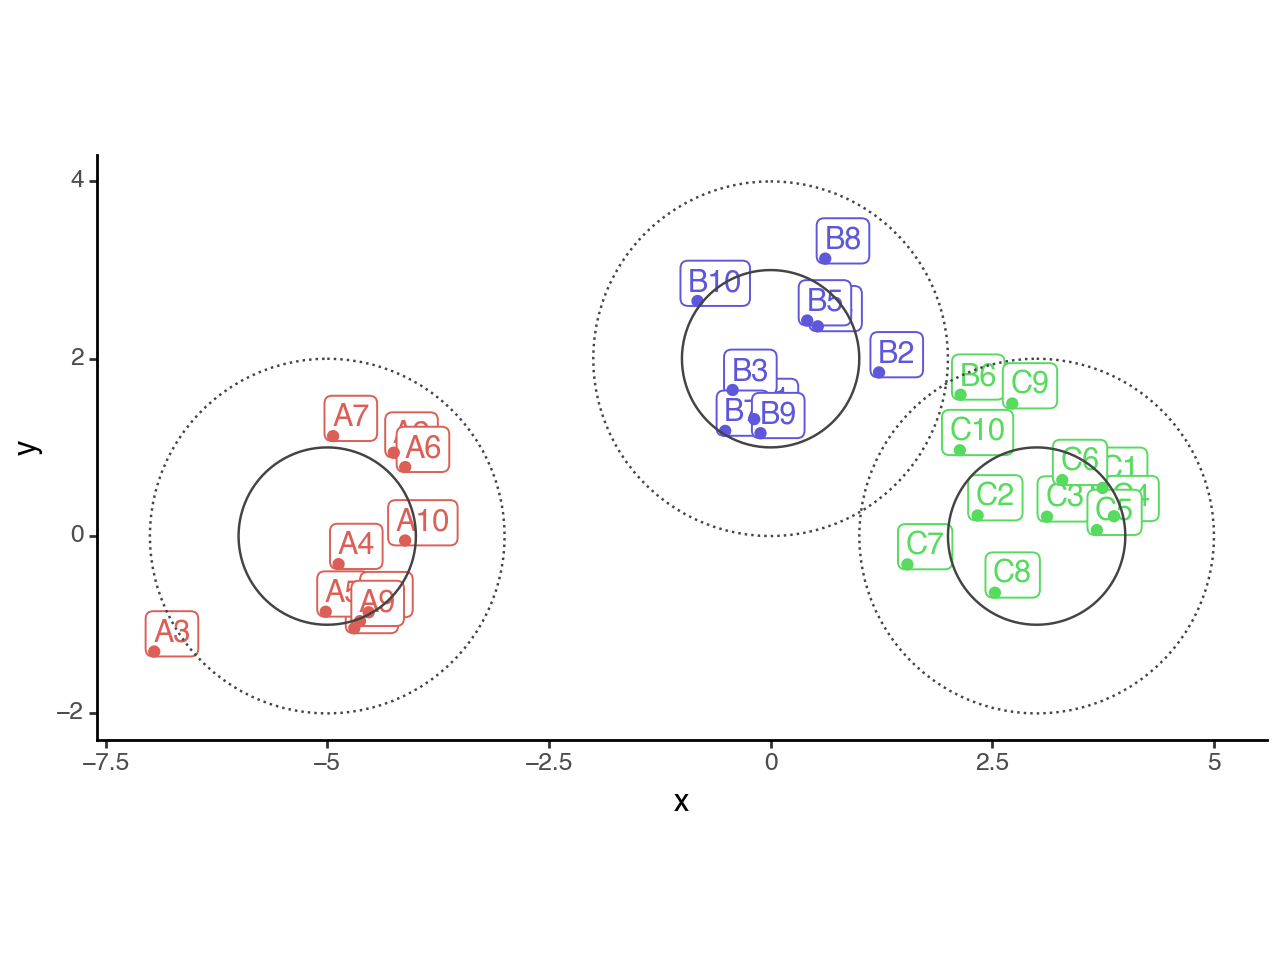

<Figure Size: (640 x 480)>

In [8]:
g_krogi_skupine = (
    p9.ggplot(krogi_skupine) +
    p9.aes(
        x = "x",
        y = "y",
        label = "id",
        color = "skupina"
    ) +
    p9.geom_label(
        nudge_x = 0.2,
        nudge_y = 0.2
    ) +
    p9.geom_point() +
    p9.guides(color = None) +
    p9.coord_equal() +
    p9.theme_classic()
)

for c in centri:
    g_krogi_skupine += (
        p9.annotate(
            "path",
            color = "#444444",
            x = [c[0] + sin(p) for p in phis],
            y = [c[1] + cos(p) for p in phis]
        )
    )
    g_krogi_skupine += (
        p9.annotate(
            "path",
            color = "#444444",
            linetype = "dotted",
            x = [c[0] + 2 * sin(p) for p in phis],
            y = [c[1] + 2 * cos(p) for p in phis]
        )
    )
g_krogi_skupine

Za vajo poskusi spremeniti nastavitve algoritma HAC tako, da razvrstiš podatke v dve ali štiri skupine. Poskusi tudi različne mere razdalje med točkami in skupinami. Vizualno primerjaj različna razvrščanja v skupine, ki jih dobiš z različnimi nastavitvami.

## Naloge

1. Za funkcijo razdalje $d$ velja trikotniška neenakost, če za vse $u$, $v$, $w$ velja $d(u,v) \leq d(u, w) + d(w, v)$. Dokaži, da trikotniška neenakost velja za Evklidsko in Manhattansko razdaljo. Ali velja tudi za razdaljo Minkowskega z vrednostjo $q = 1/2$?

1. Za umetne podatke iz teh predavanj sestavi dendrogram z Wardovo mero razdalje med skupinami. Z uporabo dobljenega dendrograma razvrsti točke v štiri skupine. Sestavi podatkovno tabelo z dvema stolpcema, v prvem naj bo oznaka `id` točke, v drugem pa indeks skupine `skupina`, kjer točka pripada.

    Sestavi še eno podatkovno tabelo s štirimi stolpci, kjer prejšnji tabeli dodamo še stolpca `x` in `y` s koordinatami točke v prostoru $\mathbb{R}^2$. Uporabi to tabelo za vizualizacijo pripadnosti točk skupinam v prostoru $\mathbb{R}^2$.

1. Članek [Eurovision Song Contest 2022](https://en.wikipedia.org/wiki/Eurovision_Song_Contest_2022) iz spletne enciklopedije Wikipedia podaja tabelo z rezultati telefonskega glasovanja držav na finalni večer pesmi Evrovizije 2022 (tabela z naslovom _Detailed televoting results of the final_).

    S pomočjo te tabele razvrstite države, ki so glasovale na finalni večer, v **štiri** skupine glede na podobnost porazdelitve točk iz telefonskega glasovanja med tekmovalnimi državami. Na zemljevidu vseh držav, ki so glasovale na finalni večer, razen Avstralije, pobarvaj posamezne države glede na njihovo pripadnost štirim skupinam.
    
    Ugotovi kateri skupini pripada Slovenija in sestavi seznam z imeni držav iz te skupine. Preveri kako se elementi seznama spreminjajo s spreminjanjem mere razdalje med skupinami v algoritmu HAC.
